In [1]:
# Necessário para exibir as imagens no notebook.
%matplotlib inline

## Antes de falar do problema...


### Vamos criar uma função simples para plotar gráficos de barra

Essa função será útil em alguns momentos para visualização simples dos dados em um gráfico de barras. A nossa função terá três parâmetros:
- **vetor**, um vetor de valores onde cada valor representa a altura de uma barra;
- **w**, largura do gráfico;
- **h**, altura do gráfico;
- **title**, título do gráfico.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(vetor, w=14, h=6, title=''):
    """ Função para plotar um gráfico de barras
    """
    # Definindo tamanho da imagem
    plt.figure(figsize=(w, h), dpi=100)
    # Para plotar o grid (as linhas horizontais):
    plt.grid(b=True, which='both', color='0.5',linestyle='-', axis='y')
    # Plotando as barras
    plt.bar(range(len(vetor)), vetor, color="#4169E1", edgecolor="#4169E1")
    # Definindo a legenda sobre o eixo x e sua localização
    plt.xticks(np.arange(len(vetor)) + 0.4, range(len(vetor)))
    # Limitando a parte que será visível do eixo x
    plt.xlim([-0.2, len(vetor)])
    # Definindo um titúlo
    plt.title(title)
    # Exibindo o gráfico
    plt.show()

Vamos fazer um simples teste, considere o vetor:

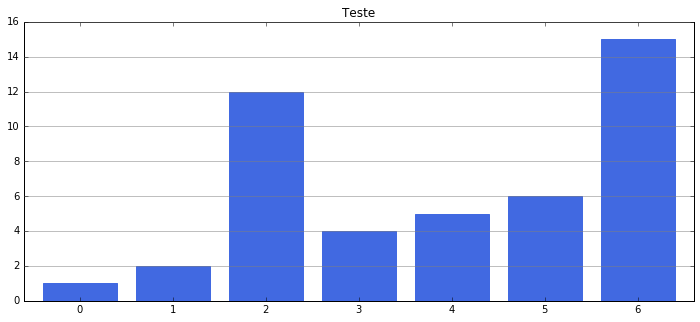

In [3]:
v = [1, 2, 12, 4, 5, 6, 15]

plot_bar_chart(vetor=v, w=12, h=5, title='Teste')

# 1. O Spambase Data Set

O Spambase data set está disponível no site da [UCI](https://archive.ics.uci.edu/ml/datasets/Spambase).O conjunto de dados comtém 4600 mensagens de email classificadas como spam ou não-spam, e o nosso objetivo é construir um classificador que seja capaz de distinguir, com uma boa precisão, um spam de um email normal.


Nessa base de dados, cada email foi convertido em uma sequência de 58 valores numericos (58 atributos), onde:

- [0-47] 48 palavras mais citadas nos emails, onde cada valor representa a probabilidade da palavra ser encontrada no email (*[número de ocorrências]/[total de palavras] x 100 *);
- [48-53] 6 caracteres mais frequentes nos emails, e cada valor representa a probabiidade do caracter ser encontrado no email (*[número de ocorrências]/[total de caracteres] x 100*);
- [54] comprimento médio das palavras escritas em caixa alta;
- [55] comprimento da maior palavra escritas em caixa alta;
- [56] total de letras em maiúsculo no email.
- [57] a classe do email: 1 (spam) ou 0 (não-spam).

Diante disso, nosso primeiro passo será carregar esse dados.
___
## 1.1 Leitura e Visualização dos dados

Os dados estão em um arquivo *.csv* (uma planilha) e a leitura dele será feita utilizando o pandas. Após a leitura esses dados serão copiados em uma variável local.

In [4]:
import pandas as pd

# Lendo csv
csv_data = pd.read_csv("data/spambase.csv")  # Localização do arquivo

# Copiando os dados do csv
data = csv_data.values.copy()

# Exibindo as primeiras 5 linhas
csv_data[:5]

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.0,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,0.0,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.0,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.0,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 1.2 Separando atributos das classes

A última coluna na matriz representa a classe a qual cada email pertence. É necessário separar atributos das classes, já que o objetivo do classificador é: a partir de uma coleção de atributos identificar a classe a qual eles pertencem.

In [5]:
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna

## 1.3 Conhecendo um pouco mais os nossos dados

Antes de escolher um classificador é importante conhecer os nossos dados, entender sua origem e visualizar a distribuição dos atributos na base.

Primeiro, vamos ver como esses atributos estão distribuídos, vamos representar em um gráfico o número de ocorrências de cada atributo no nosso conjunto de dados. Para tanto, será necessário converter a matriz que temos para uma matriz de ocorrências, ou seja, ao invés da frequência que uma palavra ocorre no email, queremos agora saber apenas se ela está presente ou não. Nessa primeira etapa será utilizada a função **binarize** que irá converter cada valor **n** de uma matriz em 0 ou em 1 de acordo com o valor de um *threshold*. Caso o *threshold* seja 0:
- o novo valor será 0, se **n** for menor ou igual à 0, ou
- o novo valor será 1, se caso contrário.

Exemplo:

In [6]:
from sklearn.preprocessing import binarize

vetor = [[0.0, 1.0, 0.2,],
         [-0.1, 1.5, 0.01]]
binarize(vetor, threshold=0.0)

array([[ 0.,  1.,  1.],
       [ 0.,  1.,  1.]])

Em seguida, a função numpy.sum será utilizada para calcular a quantidade de ocorrências de cada atributo. Ela simplesmente irá somar os valores de cada coluna e retornará um vetor onde cada valor representará uma coluna com a quantidade de ocorrências do atributo.

In [7]:
x_binario = binarize(x, threshold=0.0)
histograma = np.sum(x_binario, 0)
histograma

array([ 1053.,   897.,  1887.,    47.,   148.,   999.,   807.,   824.,
         773.,  1302.,   709.,  2324.,   852.,   357.,   336.,  1240.,
         963.,  1037.,  3226.,   424.,  2422.,   117.,   679.,   735.,
        1090.,   811.,   780.,   463.,   372.,   469.,   293.,   205.,
         405.,   215.,   485.,   599.,   829.,    83.,   384.,   453.,
         148.,   341.,   375.,   327.,  1311.,   517.,    63.,   203.,
         790.,  2715.,   529.,  2257.,  1400.,   750.,  4600.,  4600.,
        4600.])

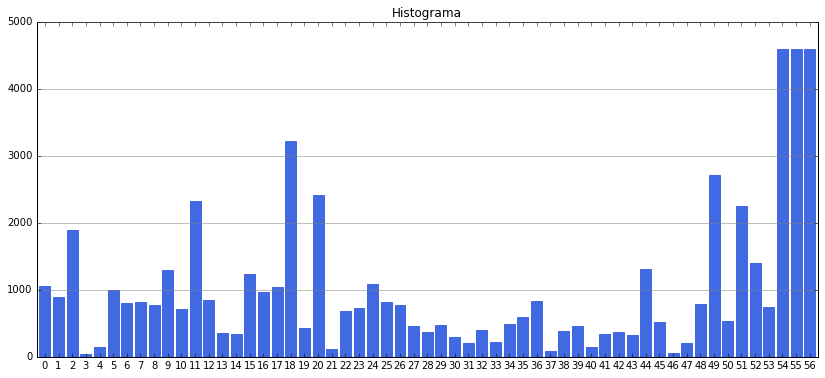

In [8]:
plot_bar_chart(vetor=histograma, title="Histograma")

Observando o histograma, podemos verificar que os 3 últimos atributos têm valores diferentes de 0 em todas as amostras. Vale lembrar que esses últimos atributos são referentes a ocorrência de palavras em caixa alta. Verificamos também que alguns atributos são bem mais frequentes que os outros.

## 1.4 Divisão do conjunto de dados em dois grupos: grupo de treinamento (70%) e grupo de teste (30%)

Como foi apresentado na aula teórica, temos que treinar o classificador e depois testá-lo para verificar o seu desempenho. Para essa duas etapas são necessários dois conjuntos de dados diferentes: o de treinamento e o de teste/validação. Como temos apenas um conjunto de dados, é preciso dividí-lo em dois sub conjuntos, geralmente o conjunto de treinamento é 70% do total e o de teste, 30%. Nessa divisão é interessante que a proporção de amostras/classe seja mantida para garantir que todas as classes serão bem representadas em cada conjunto.

No scikit learn o método *train_test_split* lhe permite fazer a divisão de uma coleção de dados em duas partes respeitando as proporções de amostras/atributo.

In [9]:
from sklearn.cross_validation import train_test_split

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

Para verificar essa proporção vamos exibir o total e o percentual em cada uma dessas variáveis.

In [10]:
# total no conjunto de treino
total_spam_treino = np.sum(y_treino)
# percentual
percent_spam_treino = total_spam_treino/len(y_treino) * 100

# total no conjunto de teste
total_spam_teste = np.sum(y_teste)
# percentual
percent_spam_teste = total_spam_teste/len(y_teste) * 100

print "Total de Spam no conjunto de teste: %d (%d%%) " % (total_spam_teste, percent_spam_teste)
print "Total de Spam no conjunto de treino: %d (%d%%) " % (total_spam_treino, percent_spam_treino)

Total de Spam no conjunto de teste: 544 (39%) 
Total de Spam no conjunto de treino: 1268 (39%) 


E observando os gráficos abaixo, percebemos que todos os atributos também estão bem representados nos dois conjuntos.

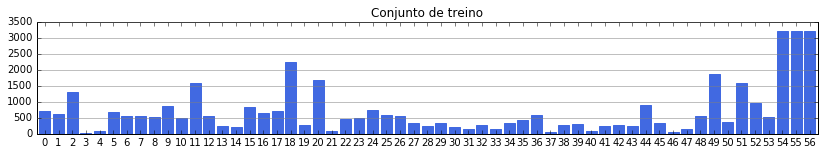

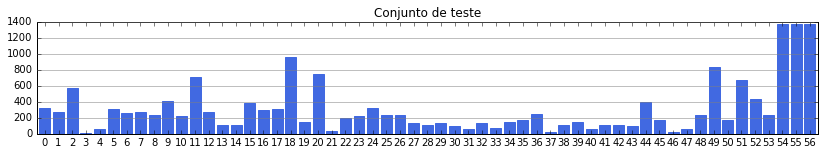

In [11]:
plot_bar_chart(vetor=np.sum(binarize(x_treino), 0), h=2, title=u"Conjunto de treino")
plot_bar_chart(vetor=np.sum(binarize(x_teste), 0), h=2, title=u"Conjunto de teste")

___
## Código até aqui (Resumo)

In [12]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split

# Lendo csv
csv_data = pd.read_csv("data/spambase.csv")

# Copiando os dados do csv
data = csv_data.values.copy()

# Embaralhando os dados para garantir aleatoriedade entre as amostras
# np.random.shuffle(data)

# Separando atributos de classes
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

Agora que já temos uma noção sobre quem são e como estão distribuídos os nossos dados, vamos aprender a classificá-los!